### Importing Data

In [1]:
# load required libraries
import numpy as np
import pandas as pd
import csv

In [2]:
StudentsPerformance = pd.read_csv('StudentsPerformance.csv')

In [3]:
# load csv file
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Processing

In [5]:
# view number of rows and column
df.shape

(1000, 8)

In [6]:
# view data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# view summary statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# view value count for gender
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### Data Visualization

In [9]:
# load required libraries
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
# check for missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Figure size 432x288 with 0 Axes>

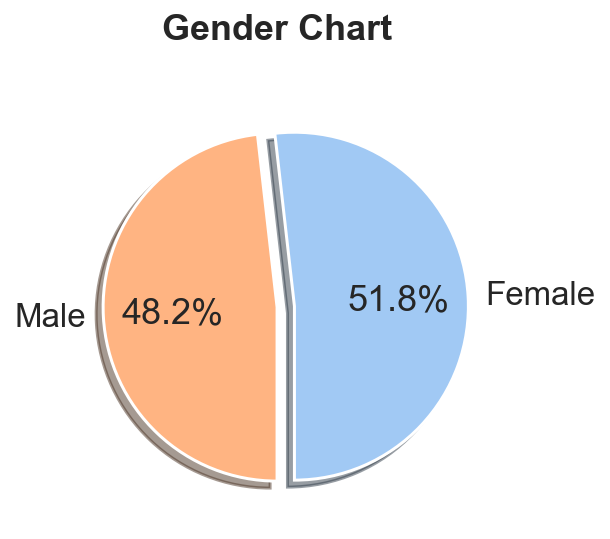

In [119]:
# gender pie chart
plt.figure()
labels = ['Female', 'Male']
explode = [0.1, 0]
values = df['gender'].value_counts()

fig1, ax1 = plt.subplots()
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=-90)
plt.title('Gender Chart\n', fontsize=18, fontweight='bold')
plt.show()

In [13]:
# create a custom column for grade and percentage
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

df['percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
df['grade'] = df.apply(lambda x : Grade(x['percentage']), axis=1)

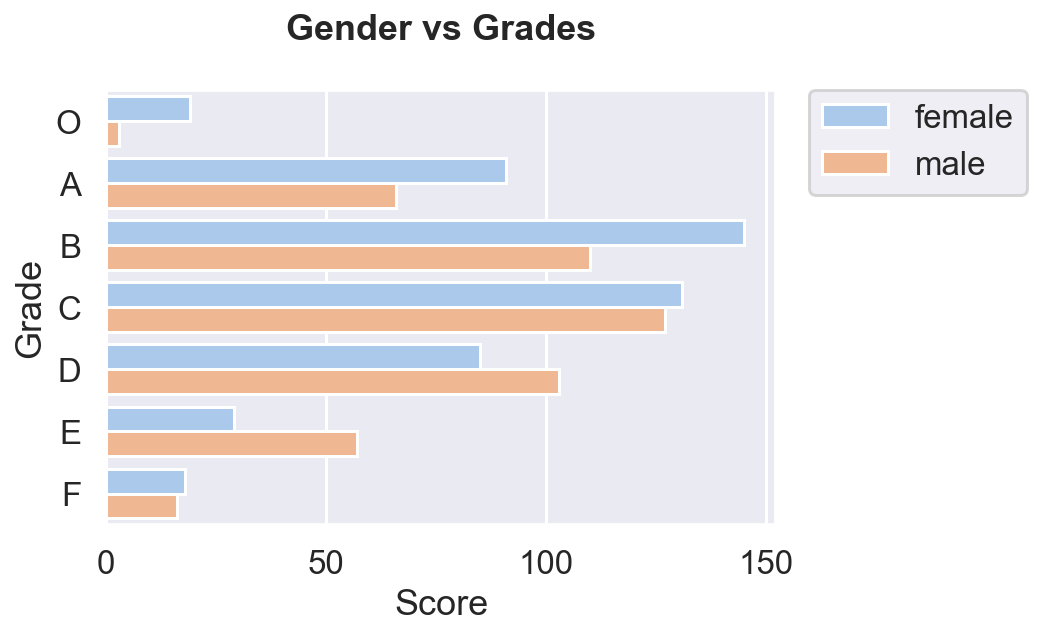

In [98]:
# graph plot of grades against gender
plt.figure()
sb.set(style="darkgrid")
sb.set_context('talk',font_scale=1)
sb.set_palette('pastel')
ax = sb.countplot(y='grade', hue="gender", data=df, order=["O","A","B","C","D","E","F"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gender vs Grades\n', fontsize=18, fontweight='bold')
ax.set(xlabel='Score',ylabel='Grade')
plt.show()

<Figure size 432x288 with 0 Axes>

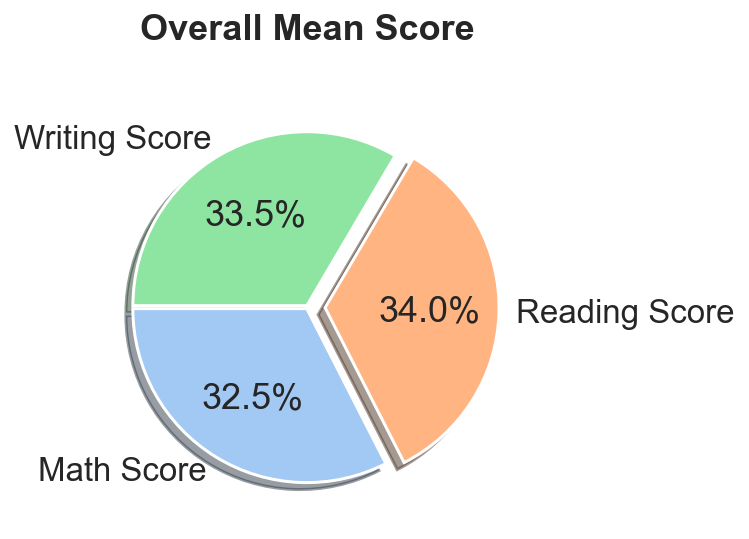

In [117]:
# overall mean score chart
plt.figure()
labels = ['Math Score', 'Reading Score', 'Writing Score']
explode = [0.01, 0.1, 0.01]
values = [df['math score'].mean(), df['reading score'].mean(), df['writing score'].mean()]

fig1, ax1 = plt.subplots()
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Overall Mean Score\n', fontsize=18, fontweight='bold')
plt.show()

<Figure size 432x288 with 0 Axes>

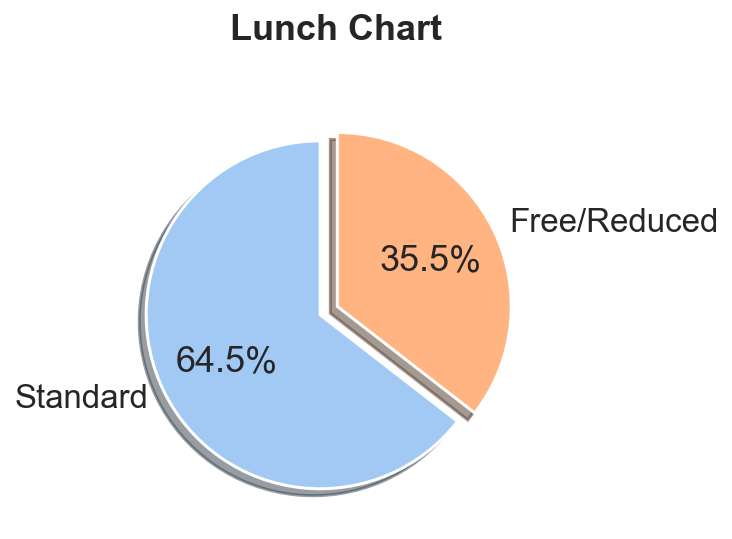

In [116]:
# pie chart for lunch
plt.figure()
labels = ['Standard', 'Free/Reduced']
sizes = df['lunch'].value_counts()
explode=[0.1, 0.01]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Lunch Chart\n', fontsize=18, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Parental Level of Education vs Race \n')

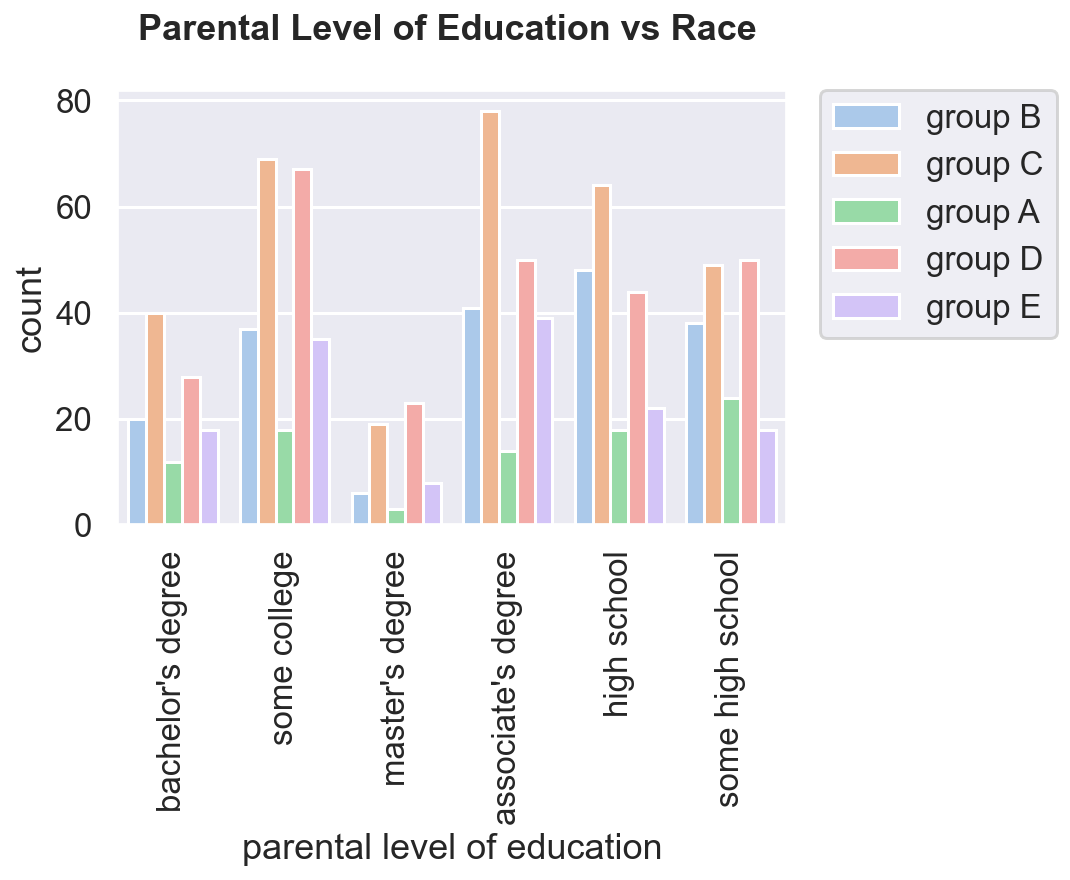

In [95]:
a = 'parental level of education'
b = 'race/ethnicity'
plt.figure()

sb.set_context('talk',font_scale=1)
sb.countplot(x=a, data=df, hue=b)
plt.legend(loc='upper right', frameon=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Parental Level of Education vs Race\n', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Parental Level of Education vs Gender \n')

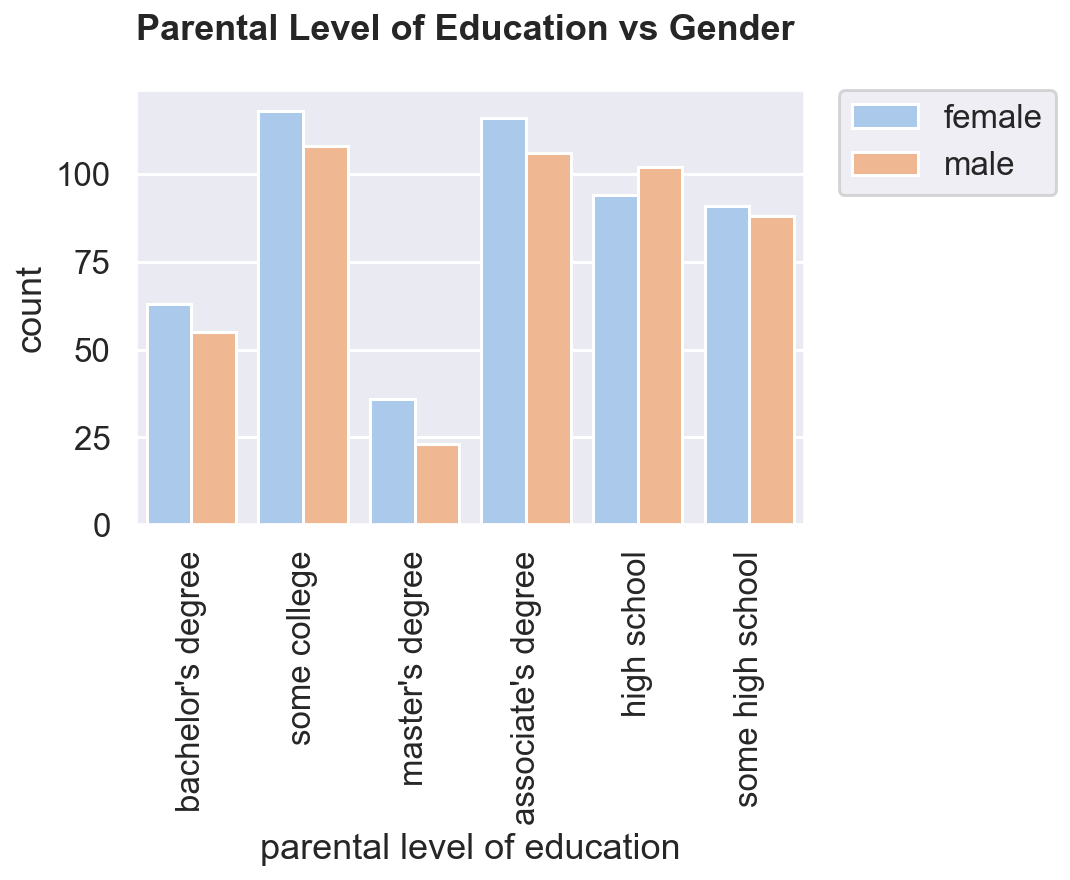

In [96]:
a = 'parental level of education'
b = 'gender'
plt.figure()

sb.set_context('talk',font_scale=1)
sb.countplot(x=a, data=df, hue=b)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Parental Level of Education vs Gender\n', fontsize=18, fontweight='bold')

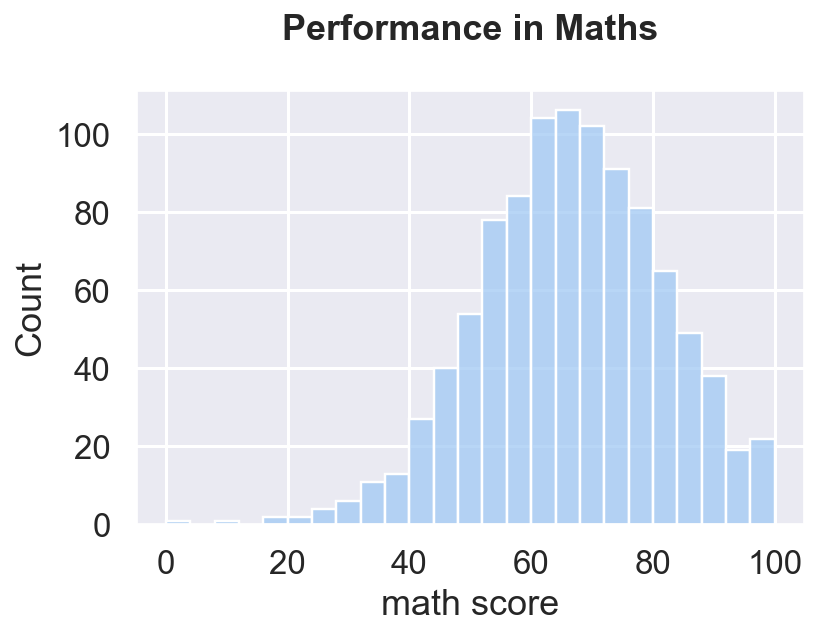

In [100]:
plt.title('Performance in Maths\n', fontsize=18, fontweight='bold')
sb.set_context('talk',font_scale=1)
sb.histplot(data=df, x='math score')

<Figure size 432x288 with 0 Axes>

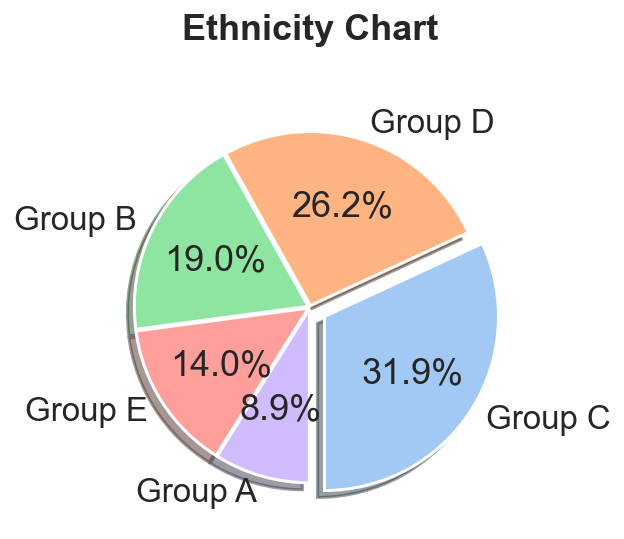

In [115]:
# pie chart of race performance
plt.figure()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
sizes = df['race/ethnicity'].value_counts()
explode=[0.1, 0.01, 0.01, 0.01, 0.01]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
plt.title('Ethnicity Chart\n', fontsize=18, fontweight='bold')
plt.show()